### The first problem 

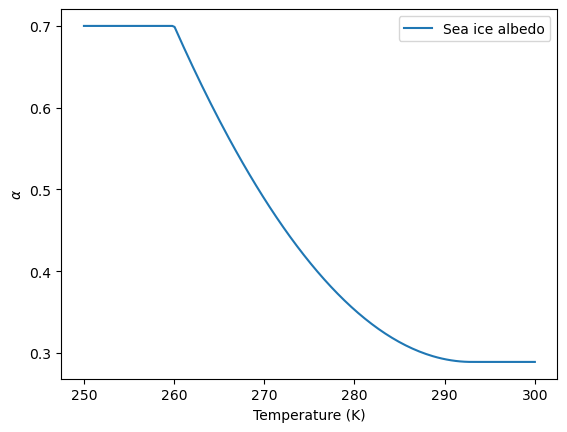

In [1]:
# As usual, we start with some import statements.
import numpy as np
import matplotlib.pyplot as plt
import climlab  # import climlab just like any other package

a = np.zeros(200)
# Define a function to describe the formula
def temp_albedo(T):
    if T<=260:
        alpha = 0.7
        return alpha
    elif (T>260)&(T<293):
        alpha = 0.289 + (0.7 - 0.289) * ((T - 293) **2 / (260 - 293) **2)
        return alpha
    elif T>=293:
        alpha = 0.289
        return alpha

# Set up a wide range of planetary temperature with step = 0.5
flg = 0

for T_planet in np.linspace(250, 300, 200):
    a[flg] = temp_albedo(T_planet)
    flg = flg + 1

plt.plot(np.linspace(250, 300, 200), a, label='Sea ice albedo')
plt.xlabel('Temperature (K)')
plt.ylabel(r'$\alpha$')
plt.legend()

### The second problem

In [4]:
#  As usual, we start with some import statements.
import numpy as np
import matplotlib.pyplot as plt
import climlab  # Import climlab just like any other package

# Create a zero-dimensional domain with a single surface temperature
state = climlab.surface_state(num_lat=1,  # A single point
                              water_depth = 100.,  # 100 meters slab of water (sets the heat capacity)
                             )

delta_t = 60. * 60. * 24. * 10  # 10 days 
state.Ts[:] = 288-273. # Convert inital K to C  
albedo_initial = temp_albedo(288.) # Calculate the initial albedo according the function defined as above
print(albedo_initial)

0.29843526170798895


In [5]:
# Create the longwave radiation process
olr = climlab.radiation.Boltzmann(name='OutgoingLongwave',
                                  state=state, 
                                  tau = 0.57,
                                  eps = 1.,
                                  timestep = delta_t)

asr = climlab.radiation.SimpleAbsorbedShortwave(name='AbsorbedShortwave',
                                                state=state, 
                                                insolation=341.3, 
                                                albedo = 0.298, # Use temperature dependent albedo defined as above
                                                timestep = delta_t)


In [6]:
#  couple them together into a single model
ebm = climlab.couple([olr,asr])
#  Give the parent process name
ebm.name = 'EnergyBalanceModel'

In [7]:
num_steps = 1800 # total 50years, one step presents about 10days
Tarray = np.zeros(num_steps)

for n in range(num_steps):
    ebm.subprocess['AbsorbedShortwave'].albedo = temp_albedo(ebm.Ts+273)
    
    Tarray[n] = ebm.Ts
    ebm.step_forward()
    print(ebm.subprocess['AbsorbedShortwave'].albedo)

[[0.29843526]]
[[0.29830609]]
[[0.29817829]]
[[0.29805184]]
[[0.29792675]]
[[0.297803]]
[[0.29768057]]
[[0.29755948]]
[[0.29743969]]
[[0.29732121]]
[[0.29720402]]
[[0.29708812]]
[[0.2969735]]
[[0.29686014]]
[[0.29674804]]
[[0.2966372]]
[[0.29652759]]
[[0.29641921]]
[[0.29631205]]
[[0.2962061]]
[[0.29610136]]
[[0.2959978]]
[[0.29589544]]
[[0.29579425]]
[[0.29569422]]
[[0.29559535]]
[[0.29549763]]
[[0.29540104]]
[[0.29530559]]
[[0.29521125]]
[[0.29511803]]
[[0.2950259]]
[[0.29493487]]
[[0.29484493]]
[[0.29475605]]
[[0.29466825]]
[[0.2945815]]
[[0.29449579]]
[[0.29441113]]
[[0.29432749]]
[[0.29424488]]
[[0.29416327]]
[[0.29408267]]
[[0.29400306]]
[[0.29392444]]
[[0.2938468]]
[[0.29377012]]
[[0.2936944]]
[[0.29361963]]
[[0.2935458]]
[[0.29347291]]
[[0.29340094]]
[[0.29332989]]
[[0.29325974]]
[[0.29319049]]
[[0.29312213]]
[[0.29305466]]
[[0.29298806]]
[[0.29292232]]
[[0.29285744]]
[[0.29279341]]
[[0.29273022]]
[[0.29266786]]
[[0.29260633]]
[[0.29254561]]
[[0.2924857]]
[[0.29242659]]
[[0.292

In [8]:
# Reproduce the case we did in class
ebm2 = climlab.process_like(ebm)

ebm2.subprocess['AbsorbedShortwave'].albedo = 0.32 #Same as the case we did in class
ebm2.state.Ts[:] = 32 #Same as the case we did in class
num_steps = 1800 # 10 days one step, total 49.31 years
Tarray1 = np.zeros(num_steps)

for n in range(num_steps):
    ebm2.step_forward()
    Tarray1[n] = ebm2.Ts


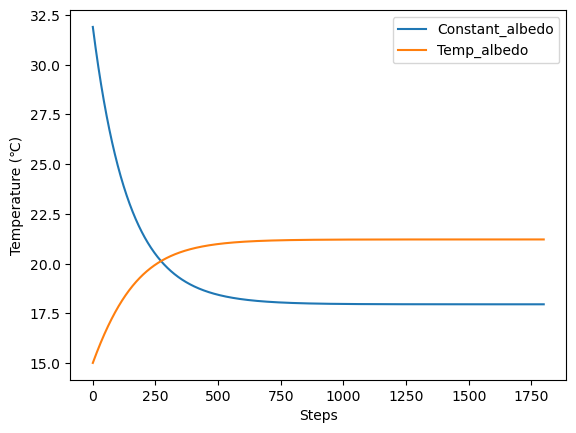

In [9]:
plt.plot(Tarray1, label = 'Constant_albedo')
plt.plot(Tarray, label = 'Temp_albedo')
plt.xlabel('Steps')
plt.ylabel('Temperature (℃)')
plt.legend()